# NYC Schools SAT Score Analysis

### *Author:* Grady Cooke
### *Date:* June 8, 2025


## Summary

Every year, U.S. high school students take the SAT, a standardized test made up of math, reading, and writing sections, each scored out of 800. In this notebook, I analyze SAT performance across NYC public schools using a dataset called schools.csv. The goal is to explore how schools compare and answer a few key questions that could be useful to educators, researchers, and families. Key questions examined include which schools have the strongest math scores, which are the top performers overall, and how performance varies by borough. 



## Dataset Overview

In [4]:
# Re-run this cell 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [5]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [6]:
schools.describe(include='all')

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
count,375,375,375,375.000000,375.000000,375.000000,355.000000
unique,375,5,233,NaN,NaN,NaN,NaN
top,"New Explorations into Science, Technology and ...",Brooklyn,X425,NaN,NaN,NaN,NaN
freq,1,109,6,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,432.944000,424.504000,418.458667,64.976338
std,NaN,NaN,NaN,71.952373,61.881069,64.548599,18.747634
min,NaN,NaN,NaN,317.000000,302.000000,284.000000,18.500000
25%,NaN,NaN,NaN,386.000000,386.000000,382.000000,50.950000
50%,NaN,NaN,NaN,415.000000,413.000000,403.000000,64.800000
75%,NaN,NaN,NaN,458.500000,445.000000,437.500000,79.600000


The dataset preview shows that NYC public schools vary widely in average SAT performance. While average section scores hover around the mid-400s, a few schools significantly outperform others.

## Analyzing Math SAT Results

Which NYC schools have the best math results?

The best math results are defined to be at least 80% of the *maximum possible score of 800* for math.

In [10]:
# Select desired columns
schools_name_and_math = schools[["school_name","average_math"]]

# Set filter
filter = 0.8 * 800

# Filter by math score 
best_math_schools = schools_name_and_math[schools_name_and_math["average_math"] >= filter]

# Sort by math score
best_math_schools = best_math_schools.sort_values("average_math", ascending = False)

# Reset indices
best_math_schools.reset_index(drop=True, inplace=True)

# View the result
print("Top Schools with Best Math Scores:")
display(best_math_schools)

Top Schools with Best Math Scores:


,school_name,average_math
0,Stuyvesant High School,754
1,Bronx High School of Science,714
2,Staten Island Technical High School,711
3,Queens High School for the Sciences at York Co...,701
4,"High School for Mathematics, Science, and Engi...",683
5,Brooklyn Technical High School,682
6,Townsend Harris High School,680
7,High School of American Studies at Lehman College,669
8,"New Explorations into Science, Technology and ...",657
9,Eleanor Roosevelt High School,641


It would be interesting to evaluate the following question: Of these top math schools, are high scores in math associated with high scores in the reading and writing sections of the SAT?

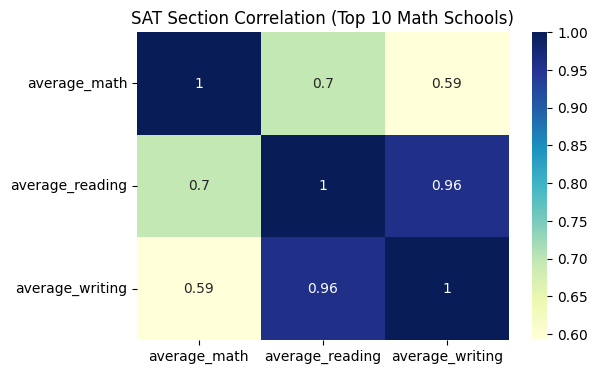

In [12]:
# Create a DataFrame with all SAT sections for top 10 schools
top10_full = schools.loc[schools["school_name"].isin(best_math_schools["school_name"])][
    ["school_name", "average_math", "average_reading", "average_writing"]
]

# Compute the correlation matrix
correlation_matrix = top10_full[["average_math", "average_reading", "average_writing"]].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("SAT Section Correlation (Top 10 Math Schools)")
plt.show()

Math scores are positively correlated with reading (0.70) and, to a lesser extent, writing (0.59), indicating that while strong performance in math often aligns with strength in other sections, it's not tightly linked. Unsurprisingly, the heatmap shows a strong positive correlation between reading and writing scores (0.96), suggesting students tend to perform similarly in those areas. 

## Analyzing Total SAT Score

What are the top 10 performing schools based on the combined SAT scores?

In [16]:
# Create a new column for total SAT score
schools["total_SAT"] = (
    schools["average_math"] + 
    schools["average_reading"] + 
    schools["average_writing"]
)

# Select appropriate columns, sort by SAT score, and take top 10 results
top_10_schools = schools[["school_name","total_SAT"]].sort_values("total_SAT", ascending = False).head(10)

# Reset indices
top_10_schools.reset_index(drop=True, inplace=True)

# View the result
print("Top 10 Performing Schools by Total SAT:")
display(top_10_schools)

Top 10 Performing Schools by Total SAT:


,school_name,total_SAT
0,Stuyvesant High School,2144
1,Bronx High School of Science,2041
2,Staten Island Technical High School,2041
3,High School of American Studies at Lehman College,2013
4,Townsend Harris High School,1981
5,Queens High School for the Sciences at York Co...,1947
6,Bard High School Early College,1914
7,Brooklyn Technical High School,1896
8,Eleanor Roosevelt High School,1889
9,"High School for Mathematics, Science, and Engi...",1889


Which single borough has the largest standard deviation in the combined SAT score?

In [18]:
# The total_SAT column was defined in the code above

# Group by borough and compute stats
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2).reset_index()

# Filter for the borough with the largest std deviation
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename columns
largest_std_dev = largest_std_dev.rename(
    columns={
        "count": "num_schools",
        "mean": "average_SAT",
        "std": "std_SAT"
    }
)

# Reset indices
largest_std_dev.reset_index(drop=True, inplace=True)

# View the result
print("Borough with the Largest SAT Score Std Dev:")
display(largest_std_dev)

Borough with the Largest SAT Score Std Dev:


,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29


So, how well is each borough performing? How do total SAT score distributions compare across boroughs?

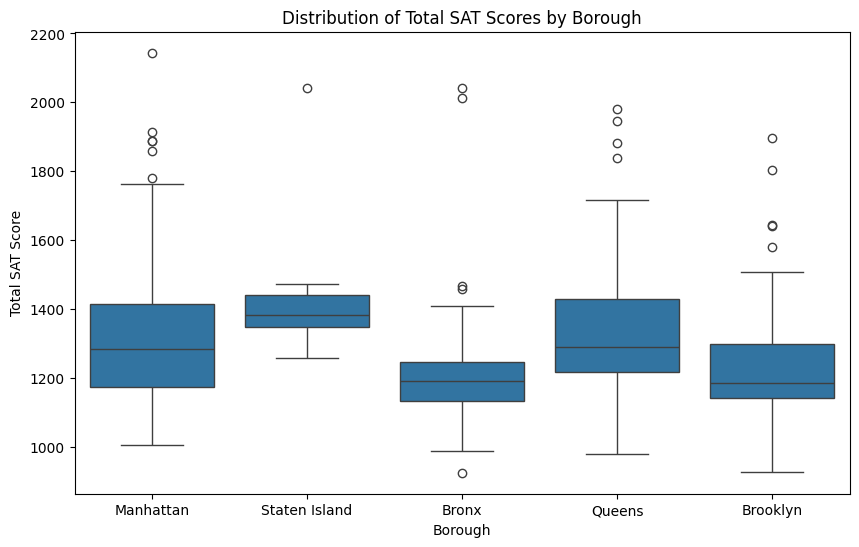

In [20]:
# Create a box plot of average total SAT score for each borough
plt.figure(figsize=(10, 6))
sns.boxplot(x='borough', y='total_SAT', data=schools)
plt.title("Distribution of Total SAT Scores by Borough")
plt.ylabel("Total SAT Score")
plt.xlabel("Borough")
plt.show()

The box plot reveals that while Manhattan has the widest spread of SAT scores—including several high-performing outliers—it also shows considerable variability, supporting its high standard deviation. Staten Island appears more consistent, with scores clustered tightly around the median.

## Conclusion

This analysis of NYC public school SAT performance uncovered several meaningful trends. First, by filtering for students achieving at least 80% of the maximum math score, we identified a clear group of high-performing schools, with Stuyvesant High School and Bronx High School of Science leading the pack. Correlation analysis among the SAT sections of these top performers revealed a strong relationship between reading and writing scores (r = 0.96), suggesting that verbal proficiency tends to develop in tandem, while math scores showed slightly weaker but still notable correlations with the other sections.

Ranking schools by total SAT scores provided a more holistic view of academic excellence, with the same top schools consistently appearing at the top, reinforcing their well-rounded performance. Further analysis grouped schools by borough, revealing that Manhattan has the highest average SAT score but also the greatest variability, indicating both elite schools and those needing support exist within the same district. Finally, a boxplot of SAT score distribution visually confirmed these disparities across boroughs.

In summary, this project not only highlighted top-performing schools but also emphasized structural variation in achievement across boroughs. These findings offer actionable insights for educators, parents, and policymakers to celebrate areas of excellence and identify regions where additional support could improve equity in educational outcomes.